In [1]:
# This example demonstrates the creation of a Bell state with noise using qstack.
# A Bell state is a maximally entangled quantum state of two qubits.
# This example also introduces a noise model to simulate realistic quantum systems.
# The Toy layer is a simplified abstraction layer for quantum operations, useful for prototyping and testing.
# It uses gates with names that reflect the intention (e.g., Flip) instead of the mathematical operation (e.g., X).
# It provides basic quantum gates and operations to define quantum programs.
import qstack

program = None

In [2]:
%%qstack
@instruction-set: toy

allocate q1 q2:
  mix q1
  entangle q1 q2
measure

Program(instruction_set=InstructionSet(name='toy', quantum_definitions={QuantumDefinition(name='flip', targets_length=1, matrix=[[0, 1], [1, 0]], factory=None), QuantumDefinition(name='skew', targets_length=1, matrix=None, factory=<function skew at 0x7f5239dea520>), QuantumDefinition(name='mix', targets_length=1, matrix=[[0.7071, 0.7071], [0.7071, -0.7071]], factory=None), QuantumDefinition(name='entangle', targets_length=2, matrix=[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]], factory=None)}), kernels=[Kernel(targets=(QubitId(value='q1'), QubitId(value='q2')), instructions=(QuantumInstruction(name='mix', targets=[QubitId(value='q1')], parameters={}), QuantumInstruction(name='entangle', targets=[QubitId(value='q1'), QubitId(value='q2')], parameters={})), callback=None)])

In [3]:
# Each machine in qstack is created to target a specific stack or instruction set.
# This ensures that the machine can correctly interpret and execute the program's instructions.
# Set up a local quantum machine to execute the program.
from qstack.machine import local_machine_for, local_noisy_machine_for

# Create a quantum machine with a noiseless emulator.
machine = local_machine_for(program.instruction_set)


In [4]:
# A single-shot execution runs the program once and returns the measurement outcomes.
# This is useful for observing the result of a single execution of the quantum program.
machine.single_shot(program)


(1, 1)

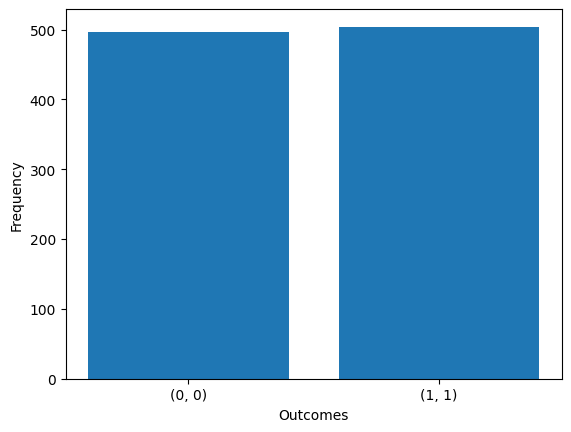

In [5]:
# Evaluate the program multiple times and plot the resulting histogram.
machine.eval(program).plot_histogram()


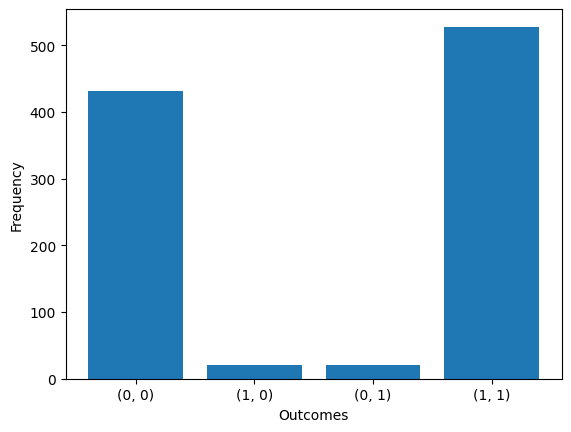

In [6]:
# Introduce a noise model to simulate realistic quantum systems.
# Here, we use a depolarizing noise channel with an error probability of 0.2.
from qstack.noise import DepolarizingNoise

noise = DepolarizingNoise(error_probability=0.2)
machine = local_noisy_machine_for(program.instruction_set, noise)

# Evaluate the program with noise and plot the resulting histogram.
machine.eval(program).plot_histogram()
